In [3]:
# !sudo apt-get install python3.7
# !sudo apt-get update -y
# !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
# !sudo update-alternatives --config python3

In [94]:
"""
maximum availible volume to pool into
"""
max_volume=500

"""
maximum availible volume to be taken out of well
"""
max_oligo_volume=80

"""
maximum availible volume to be taken out of well
"""
min_oligo_volume=4

# """
# target moles of oligo pmol
# """
# target_quantity=90

In [95]:
!pip install numpy
!pip install pyopenms
!pip install biopython
!pip install openpyxl

In [96]:
import re

# "OVFF368"
EXPERIMENT_NAME = input()
# reading file
file1 = open(f'./content/{EXPERIMENT_NAME}/{EXPERIMENT_NAME}.txt', 'r')
oligo_list = [line for line in file1.readlines() if re.search("^[a-zA-Z][1-9]", line)]
import csv

header = ['where\tcode\tseq\tDMT\tcomment\tlength\t']
data = [row.strip() for row in oligo_list]


with open(f'./content/{EXPERIMENT_NAME}/{EXPERIMENT_NAME}_oligos.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)

    writer = csv.writer(f, quotechar='\"', delimiter='\n', quoting=csv.QUOTE_NONE, escapechar='\\')
    # write the data
    writer.writerow(data)

KJE0031


In [223]:
import pandas as pd

df = pd.read_csv(f'./content/{EXPERIMENT_NAME}/{EXPERIMENT_NAME}_oligos.csv', delimiter='\t')
# drop NaN seq
df = df[df['seq'].notna()]
oligo_list = df['seq'].to_list()

In [224]:
from Bio.Seq import Seq
from Bio.SeqUtils import molecular_weight

# Bio.SeqUtils.molecular_weight(seq, seq_type='DNA', double_stranded=False, circular=False, monoisotopic=False)

from pyopenms import *

mass_list=[]
# https://biopython.org/docs/1.75/api/Bio.SeqUtils.html
for oligo_seq in oligo_list: 
    try:
        my_dna = Seq(oligo_seq)
    except:
        print(oligo_seq)
    try:
        print(f"{oligo_seq.strip()}\t" + "%0.2f" % (molecular_weight(my_dna)-79.97))
        mass_list+=["%0.2f" % (molecular_weight(my_dna)-79.97)]
    except ValueError:
        print(f"{oligo_seq.strip()}\t" + "'N' is not a valid unambiguous letter for DNA")
        mass_list+=["NaN"]
    
df['monoisotopic_mass']=mass_list
export_dataframe=df[['where', 'code', 'length', 'seq', 'monoisotopic_mass']]
export_dataframe.to_csv(f'./content/{EXPERIMENT_NAME}/{EXPERIMENT_NAME}_calculated.csv', sep = '\t', index=False)


AAA AAA AAA AAA AAA AAA AAA AAA A	7768.21
TTT TTT TTT TTT TTT TTT TTT TTT T	7542.88
AGA GAG AGA GAG AGA GAG AGA GAG A	7960.20
CCC CCC CCC CCC CCC CCC CCC CCC C	7167.59
AAA AAA AAA AAA AAA AAA AAA AAA A	7768.21
TTT TTT TTT TTT TTT TTT TTT TTT T	7542.88
AGA GAG AGA GAG AGA GAG AGA GAG A	7960.20
CCC CCC CCC CCC CCC CCC CCC CCC C	7167.59
AAA AAA AAA AAA AAA AAA AAA AAA A	7768.21
TTT TTT TTT TTT TTT TTT TTT TTT T	7542.88
AGA GAG AGA GAG AGA GAG AGA GAG A	7960.20
CCC CCC CCC CCC CCC CCC CCC CCC C	7167.59
AAA AAA AAA AAA AAA AAA AAA AAA A	7768.21
TTT TTT TTT TTT TTT TTT TTT TTT T	7542.88
AGA GAG AGA GAG AGA GAG AGA GAG A	7960.20
CCC CCC CCC CCC CCC CCC CCC CCC C	7167.59
TCG CAA AAC TAC AAA ATT TGA AAG CAA TTC ACA ACG AAG GGC TCC CAT CAC ATC ACC CTA TAG TGA GTC GTA TTA	22994.83
ACG GCA GAA GCT GGA GGA GGA AGG GCC TGA GTC CGG TTG GGT TTG GAA GGG CTC CCA TCA CAT CAA CCG G	21810.94
TAA TAC GAC TCA CTA TAG GGT GAT GTG ATG GGA GCC CTT CGT TGT AGC TCC CTT TTT C	17835.43
ACG GCA GAA GCT GGA GGA GGA A

In [225]:
# reading file with seqs 
df_calculated =  pd.read_csv(f'./content/{EXPERIMENT_NAME}/{EXPERIMENT_NAME}_calculated.csv', delimiter='\t', decimal=".")

# read concentrations file
try: 
    df = pd.read_csv(f'./content/{EXPERIMENT_NAME}/{EXPERIMENT_NAME}_concentrations.csv', delimiter=';', decimal=".")
except FileNotFoundError:
    df = pd.read_excel(f'./content/{EXPERIMENT_NAME}/{EXPERIMENT_NAME}_concentrations.xlsx')

"""
strip the text everywhere on data frame
"""
cols = df.select_dtypes(object).columns
df[cols] = df[cols].apply(lambda x: x.str.strip())
"""
and again
"""
cols = df_calculated.select_dtypes(object).columns
df_calculated[cols] = df_calculated[cols].apply(lambda x: x.str.strip())

"""
now merge cleaned dataframes
"""
merge = pd.merge(df, df_calculated, on='where', how='inner', suffixes=('', '_drop'))
#Drop the duplicate columns
merge.drop([col for col in merge.columns if 'drop' in col], axis=1, inplace=True)

# reassign
df = merge

In [226]:
df

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,oligos detected,code,length,seq,monoisotopic_mass
0,K7,NaN,CAHS94063_F0-1,1267.757249,1.936823,1.146677,3.350279,3.841689,1.983500,33,NaN,NaN,1,CAHS94063_F0-1,#= 51,ATG TCA GGT CGT AAT GTG GAG TCA CAT ATG GAG CG...,15915.26
1,L7,NaN,CAHS94063_F0-2,2541.000000,1.795210,1.341155,5.741319,7.700000,4.289191,33,NaN,NaN,1,CAHS94063_F0-2,#= 44,ATC TGC ATG ACC AGA ATT ATT AAC CAC TAC TTT TT...,13390.64
2,M7,NaN,CAHS94063_F0-3,1442.571402,2.100687,0.929622,4.702373,4.371428,2.080952,33,NaN,NaN,1,CAHS94063_F0-3,#= 53,TTA ATA ATT CTG GTC ATG CAG ATG TTA AAA AAC AA...,16341.60
3,N7,NaN,CAHS94063_F0-4,1496.008487,1.592043,1.185135,3.825183,4.533359,2.847510,33,NaN,NaN,1,CAHS94063_F0-4,#= 41,CTT CAG TGT GAG TAA ATT CTG TGT GTT CCA CTT GT...,12624.10
4,O7,NaN,CAHS94063_F0-5,930.781960,1.681301,0.820945,3.435737,2.820551,1.677601,33,NaN,NaN,1,CAHS94063_F0-5,#= 44,ACA GAA TTT ACT CAC ACT GAA GTG AAG GCT CCT TT...,13418.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,L21,NaN,phiX174-V2_F4-40,1370.397749,1.714866,1.023736,4.056435,4.152720,2.421601,33,NaN,NaN,1,phiX174-V2_F4-40,#= 51,AGT AAC TTT TCC CAG CCT CAA TCT CAT CTC TCT TT...,15417.90
226,M21,NaN,phiX174-V2_F4-41,1421.506119,1.868453,1.010577,4.262511,4.307594,2.305434,33,NaN,NaN,1,phiX174-V2_F4-41,#= 60,TTG AGG CTG GGA AAA GTT ACT GTA GCC GAC GTT TT...,18619.94
227,N21,NaN,phiX174-V2_F4-42,2541.000000,1.581532,1.112839,6.919238,7.700000,4.868698,33,NaN,NaN,1,phiX174-V2_F4-42,#= 49,TTT TAT CGA AGC GCG CAT AAA TTT GAG CAG ATT TG...,15116.72
228,O21,NaN,phiX174-V2_F4-43,1743.921390,1.802159,1.021268,5.174558,5.284610,2.932377,33,NaN,NaN,1,phiX174-V2_F4-43,#= 44,TTT ATG CGC GCT TCG ATA AAA ATG ATT GGC GTA TC...,13505.71


In [227]:
import sys
from Bio.Seq import Seq

# calculation of oligo extinction coefficients (mM^–1*cm^–1);
def e260_func(sequence):
    Coefficients = {
        "a": 15.4,
        "c": 7.4,
        "g": 11.5,
        "t": 8.7,
        "aa": 13.7,
        "ac": 10.6,
        "ag": 12.5,
        "at": 11.4,
        "ca": 10.6,
        "cc": 7.3,
        "cg": 9,
        "ct": 7.6,
        "ga": 12.6,
        "gc": 8.8,
        "gg": 10.8,
        "gt": 10,
        "ta": 11.7,
        "tc": 8.1,
        "tg": 9.5,
        "tt": 8.4,
    }
    
    Coefficients =  {key.upper(): val for key, val in Coefficients.items()}
    e260 = 0
    sequence = Seq(sequence.replace(" ", ""))
    
    for i in range(0, len(sequence) - 1):
        e260 = e260 + 2 * Coefficients[sequence[i] + sequence[i + 1]]
    for i in range(0, len(sequence) - 2):
        e260 = e260 - Coefficients[sequence[i + 1]]
    return e260

# CHANGE THIS LATER
Yield = 100

df["e260_mM^-1cm^-1"] = df["seq"].map(e260_func)
df["corrected_molar_concentration_pmol/mkl"] = (1000*2*df["A260"] / (df["e260_mM^-1cm^-1"] * (1 + (100/ Yield)))) ## (mmol/L == nmol/mkl)
df["corrected_weght_concentration"]=df["corrected_molar_concentration_pmol/mkl"]*df["monoisotopic_mass"]/1000 ## ng/mkl
df["corrected_Nucleic_Acid_Factor"]=(2/(df["e260_mM^-1cm^-1"] * (1 + (100/ Yield))))*df["monoisotopic_mass"]

df = df.round(2)

# write final merged result
df.to_csv(f'./content/{EXPERIMENT_NAME}/{EXPERIMENT_NAME}_merged_input.csv', encoding='UTF8')

In [228]:

def detect_pool_name(a, b):

    common_prefix = ''

    for x,y in zip(a, b):
        if x == y:
            common_prefix += x
        else:
            break
    common_prefix = common_prefix.strip("1234567890")
    
    regex_special_chars = "[]\.^$*+?{}|()"
    common_prefix_for_regex = common_prefix
    
    for charachter in regex_special_chars:
        # replace() "returns" an altered string
        replace_with = f"\\{charachter}"
        common_prefix_for_regex = common_prefix_for_regex.replace(charachter, replace_with)

    if re.findall(f'{common_prefix_for_regex}\d+$', b):
        return common_prefix
    
    
def detect_pool_names(df):
    possible_pool_names = []
    for index in range(len(df["code"])-1):
        a = df["code"][index]
        b = df["code"][index+1]
        
        pool_name = detect_pool_name(a, b)
        if (pool_name not in possible_pool_names) & (pool_name!=None):        
            possible_pool_names+=[pool_name]
    return possible_pool_names
    
possible_pool_names = detect_pool_names(df)


In [229]:
possible_pool_names



['CAHS94063_F0-',
 'CAHS106094_F0-',
 '',
 'phiX174-V2_F1-',
 'phiX174-V2_F2-',
 'phiX174-V2_F3-',
 'phiX174-V2_F4-']

In [230]:
for i in df.columns:
    try:
        df[i] = df[i].str.replace(',', '.').astype(float)
    except:
        pass
    
df['monoisotopic_mass'] = df['monoisotopic_mass'].astype(float)
df["pM/mkl"] = 1000*df['Nucleic Acid(ng/uL)']/df['monoisotopic_mass']
# df=df.dropna()

"""
ATTENTION!!! HERE YOU CAN CHANGE POOL NAME!!!
"""

pool_1 = "phiX174-V2_F3-"

POOL_NAME=pool_1

df = df[df["code"].str.contains(f'{POOL_NAME}\d+')]
# df = df.loc[0:53]

df

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A230,A260,A280,Nucleic Acid Factor,...,oligos detected,code,length,seq,monoisotopic_mass,e260_mM^-1cm^-1,corrected_molar_concentration_pmol/mkl,corrected_weght_concentration,corrected_Nucleic_Acid_Factor,pM/mkl
140,G16,NaN,phiX174-V2_F3-1,1890.25,1.54,1.09,5.28,5.73,3.73,33,...,1,phiX174-V2_F3-1,#= 39,TAC CGT CAA GGA CTG TGT GAC TAT TGA CGT CCT TC...,11909.65,360.4,15.89,189.29,33.05,158.715831
141,H16,NaN,phiX174-V2_F3-2,1866.16,1.93,1.07,5.28,5.66,2.93,33,...,1,phiX174-V2_F3-2,#= 44,AAC ATA AAC GTT ATT GCC CGG CGT ACG GGG AAG GA...,13638.79,443.4,12.75,173.95,30.76,136.827387
142,I16,NaN,phiX174-V2_F3-3,700.64,1.70,0.80,2.67,2.12,1.25,33,...,1,phiX174-V2_F3-3,#= 47,CCG GGC AAT AAC GTT TAT GTT GGT TTC ATG GTT TG...,14471.29,441.6,4.81,69.58,32.77,48.415863
143,J16,NaN,phiX174-V2_F3-4,2069.22,2.00,1.06,5.91,6.27,3.14,33,...,1,phiX174-V2_F3-4,#= 60,GAT TCA GCG AAA CCA ATC CGC GGC ATT TAG TAG CG...,18502.94,601.9,10.42,192.76,30.74,111.831958
144,K16,NaN,phiX174-V2_F3-5,2541.00,1.82,1.21,6.36,7.70,4.22,33,...,1,phiX174-V2_F3-5,#= 59,CGG ATT GGT TTC GCT GAA TCA GGT TAT TAA AGA GA...,18195.69,570.5,13.50,245.59,31.89,139.648455
145,L16,NaN,phiX174-V2_F3-6,2270.25,2.10,1.17,5.88,6.88,3.28,33,...,1,phiX174-V2_F3-6,#= 46,AAT AGC ACC AAA CAT AAA TCA CCT CAC TTA AGT GG...,14121.16,468.1,14.70,207.54,30.17,160.769370
146,M16,NaN,phiX174-V2_F3-7,1231.24,1.57,1.11,3.36,3.73,2.38,33,...,1,phiX174-V2_F3-7,#= 50,AGG TGA TTT ATG TTT GGT GCT ATT GCT GGC GGT AT...,15447.87,453.3,8.23,127.15,34.08,79.702898
147,N16,NaN,phiX174-V2_F3-8,2325.25,1.86,1.02,6.92,7.05,3.79,33,...,1,phiX174-V2_F3-8,#= 56,TGA CCG CCT CCA AAC AAT TTA GAC ATG GCG CCA CC...,17158.06,547.3,12.87,220.90,31.35,135.519400
148,O16,NaN,phiX174-V2_F3-9,727.20,1.75,0.87,2.54,2.20,1.26,33,...,1,phiX174-V2_F3-9,#= 53,AAT TGT TTG GAG GCG GTC AAA AAG CCG CCT CCG GT...,16468.56,512.6,4.30,70.80,32.13,44.156866
149,P16,NaN,phiX174-V2_F3-10,1585.21,1.77,0.97,4.95,4.80,2.72,33,...,1,phiX174-V2_F3-10,#= 57,CAT CAC CCA TGC CTA CAG TAT TGT TAT CGG TAG CA...,17376.18,540.5,8.89,154.43,32.15,91.228912


Text(0, 0.5, 'occurencies')

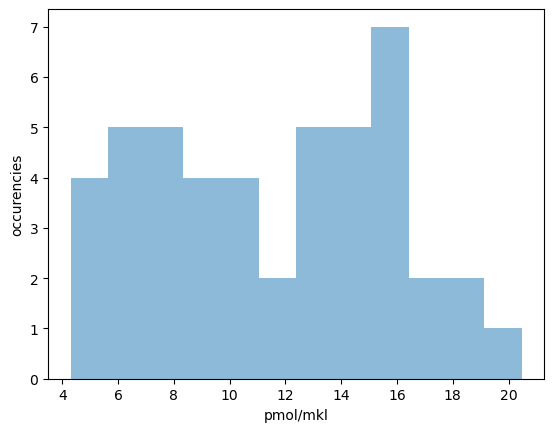

In [231]:
"""
смотрим распределение по корзинам
"""
ax = df['corrected_molar_concentration_pmol/mkl'].plot.hist(bins=12, alpha=0.5)
initial_oligos_concentrations = df['corrected_molar_concentration_pmol/mkl']
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

In [232]:
'''
определяем выбросы
'''
import pandas
import numpy as np
from scipy import stats

# %reload_ext google.colab.data_table

df['score'] = np.abs(stats.zscore(df['corrected_molar_concentration_pmol/mkl']))<1.8
# df[(np.abs(stats.zscore(df)) < 1.5).all(axis=1)]
filtered, filtered_off = (df[(np.abs(stats.zscore(df['corrected_molar_concentration_pmol/mkl'])) < 1.8)], df[(np.abs(stats.zscore(df['corrected_molar_concentration_pmol/mkl'])) >= 1.8)])
filtered_off

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A230,A260,A280,Nucleic Acid Factor,...,code,length,seq,monoisotopic_mass,e260_mM^-1cm^-1,corrected_molar_concentration_pmol/mkl,corrected_weght_concentration,corrected_Nucleic_Acid_Factor,pM/mkl,score
160,K17,NaN,phiX174-V2_F3-21,2541.0,1.67,1.17,6.6,7.7,4.61,33,...,phiX174-V2_F3-21,#= 40,ATG CTT CCT CTG CTG GTA TGG TTG ACG CCG GAT TT...,12348.93,376.1,20.47,252.82,32.83,205.766815,False


Text(0, 0.5, 'occurencies')

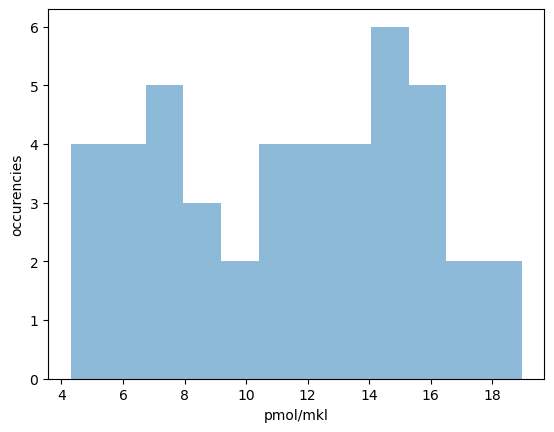

In [233]:
"""
смотрим распределение по корзинам
"""
ax = filtered['corrected_molar_concentration_pmol/mkl'].plot.hist(bins=12, alpha=0.5)
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

In [234]:
"""
split into N bins by quantiles
"""
N = 8

labels=list(np.arange(1, N))
labels = [str(elem) for elem in labels]
q = list(np.linspace(0, 1, N))

filtered["quantile"] = pd.qcut(df['corrected_molar_concentration_pmol/mkl'], q=q, labels=labels)

'''
выравниваем группы концентраций в пределах отличия в 1.5 раз
'''
highest_quantile_median_conc = filtered[filtered['quantile'] == labels[-1]]['corrected_molar_concentration_pmol/mkl'].median()
for i in labels:
    
    i_quantile_median_conc = filtered[filtered['quantile'] == i]['corrected_molar_concentration_pmol/mkl'].median()
    mkl = round(5*highest_quantile_median_conc/i_quantile_median_conc)
    filtered.loc[filtered['quantile'] == i, ['mkl']] = mkl


"""
пересчитываем моли
"""
filtered['pmol'] = filtered['mkl']*filtered['corrected_molar_concentration_pmol/mkl']
median_conc = round(filtered['corrected_molar_concentration_pmol/mkl'].median())
median_moles_in_pool = round(filtered['pmol'].median())
# print(filtered.sort_values('pM/mkl'))
print(f"equalized result: median_moles_in_pool = {median_moles_in_pool}")
filtered

equalized result: median_moles_in_pool = 82


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A230,A260,A280,Nucleic Acid Factor,...,monoisotopic_mass,e260_mM^-1cm^-1,corrected_molar_concentration_pmol/mkl,corrected_weght_concentration,corrected_Nucleic_Acid_Factor,pM/mkl,score,quantile,mkl,pmol
140,G16,NaN,phiX174-V2_F3-1,1890.25,1.54,1.09,5.28,5.73,3.73,33,...,11909.65,360.4,15.89,189.29,33.05,158.715831,True,7,5.0,79.45
141,H16,NaN,phiX174-V2_F3-2,1866.16,1.93,1.07,5.28,5.66,2.93,33,...,13638.79,443.4,12.75,173.95,30.76,136.827387,True,4,7.0,89.25
142,I16,NaN,phiX174-V2_F3-3,700.64,1.70,0.80,2.67,2.12,1.25,33,...,14471.29,441.6,4.81,69.58,32.77,48.415863,True,1,15.0,72.15
143,J16,NaN,phiX174-V2_F3-4,2069.22,2.00,1.06,5.91,6.27,3.14,33,...,18502.94,601.9,10.42,192.76,30.74,111.831958,True,3,9.0,93.78
144,K16,NaN,phiX174-V2_F3-5,2541.00,1.82,1.21,6.36,7.70,4.22,33,...,18195.69,570.5,13.50,245.59,31.89,139.648455,True,5,6.0,81.00
145,L16,NaN,phiX174-V2_F3-6,2270.25,2.10,1.17,5.88,6.88,3.28,33,...,14121.16,468.1,14.70,207.54,30.17,160.769370,True,5,6.0,88.20
146,M16,NaN,phiX174-V2_F3-7,1231.24,1.57,1.11,3.36,3.73,2.38,33,...,15447.87,453.3,8.23,127.15,34.08,79.702898,True,3,9.0,74.07
147,N16,NaN,phiX174-V2_F3-8,2325.25,1.86,1.02,6.92,7.05,3.79,33,...,17158.06,547.3,12.87,220.90,31.35,135.519400,True,5,6.0,77.22
148,O16,NaN,phiX174-V2_F3-9,727.20,1.75,0.87,2.54,2.20,1.26,33,...,16468.56,512.6,4.30,70.80,32.13,44.156866,True,1,15.0,64.50
149,P16,NaN,phiX174-V2_F3-10,1585.21,1.77,0.97,4.95,4.80,2.72,33,...,17376.18,540.5,8.89,154.43,32.15,91.228912,True,3,9.0,80.01


In [235]:
filtered_off['mkl'] = median_moles_in_pool/filtered_off['corrected_molar_concentration_pmol/mkl']
filtered_off.loc[filtered_off['mkl'] >= max_oligo_volume, ['mkl']] = max_oligo_volume
filtered_off.loc[filtered_off['mkl'] <= min_oligo_volume, ['mkl']] = min_oligo_volume
filtered_off['mkl'] = round(filtered_off['mkl'])
filtered_off

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A230,A260,A280,Nucleic Acid Factor,...,length,seq,monoisotopic_mass,e260_mM^-1cm^-1,corrected_molar_concentration_pmol/mkl,corrected_weght_concentration,corrected_Nucleic_Acid_Factor,pM/mkl,score,mkl
160,K17,NaN,phiX174-V2_F3-21,2541.0,1.67,1.17,6.6,7.7,4.61,33,...,#= 40,ATG CTT CCT CTG CTG GTA TGG TTG ACG CCG GAT TT...,12348.93,376.1,20.47,252.82,32.83,205.766815,False,4.0


In [236]:
"""
FINAL CONCATENATION AND VOLUME ASSERTION TEST
"""
result = pd.concat([filtered_off, filtered])
result['pmol'] = result['mkl']*result['corrected_molar_concentration_pmol/mkl']
total = result['mkl'].sum()
result['final conc, pmol/mkl'] = round(result['pmol']/total, 2)
print(f"calculated total volume of pool: {total} mkl")
# assert total < total_volume, "max volume exceeded"

'''
если пул больше max_volume (500 мкл) - разбиваем на столько пробирок, сколько потребуется
'''
pool_index_list = []
summ = 0
for i in result['mkl']:
  summ+=i
  pool_index_list+=[round(1+summ//max_volume)]

result['target_well'] = pool_index_list

'''
проверяем, что у нас нет разницы концентраций на порядок
'''
assert min(result['final conc, pmol/mkl'])*10 > max(result['final conc, pmol/mkl']), "разброс концентраций превышает 1 порядок!!!\nЭто непорядок!!!"
"""
если все хорошо - идем дальше
"""
result.sort_index(inplace=True)
result
print(f"разбито на {max(pool_index_list)} пробирки(ок)")

calculated total volume of pool: 388.0 mkl
разбито на 1 пробирки(ок)


In [237]:
"""
FINALWORKLIST EXPORT
"""
volume_list = round(result['mkl'], 0).astype(int)
number_of_wells = len(volume_list)

def coordinate_to_number_parser(list_of_coords):
    '''
    переводит координату на плашке из формата A1 в порядковый номер
    '''
    index_list = []
    for i in list_of_coords: 
        
        row = ord(i[0]) - 64
        column = int(i[1:])
        index_list += [16*(column-1)+row]
    
    return index_list

list_of_indexes = coordinate_to_number_parser(result["where"].to_list())

col1 = ["384well"]*number_of_wells
col2 = list_of_indexes
col3 = ["96well"]*number_of_wells
col4 = pool_index_list
col5 = volume_list.to_list()

list_of_lists = [col1, col2, col3, col4, col5]

worklist_df = pd.DataFrame(list_of_lists)
worklist_df = worklist_df.reset_index(drop=True)
worklist_df = worklist_df.T

"""
экспортируем новый worklist
"""
worklist_df.to_csv(f'./content/{EXPERIMENT_NAME}/{EXPERIMENT_NAME}_equalized_conc_worklist_{POOL_NAME}.csv', encoding='UTF8', header=None, index=False)


"""
SOME METADATA
"""
final_equalized_oligo_concentration=median_moles_in_pool/worklist_df[4].sum()
total_volume=worklist_df[4].sum()


print(f"final_equalized_oligo_concentration = ~{final_equalized_oligo_concentration:.3f} pmol/mkl")
print(f"total_volume = {total_volume:.1f} mkl")
print(f"minimal taken volume = {min(worklist_df[4]):.2f} mkl")
print(f"max taken volume = {max(worklist_df[4]):.2f} mkl")
print(f"max разброс финальных концентраций = {100*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f}% или в {2*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f} раз")
print(f"среднее значение концентраций {result['final conc, pmol/mkl'].mean():.3f}±{result['final conc, pmol/mkl'].std():.3f} pmol/mkl")

result.to_csv(f'./content/{EXPERIMENT_NAME}/{EXPERIMENT_NAME}_result{POOL_NAME}.csv', encoding='UTF8')

final_equalized_oligo_concentration = ~0.211 pmol/mkl
total_volume = 388.0 mkl
minimal taken volume = 4.00 mkl
max taken volume = 15.00 mkl
max разброс финальных концентраций = 37.55% или в 0.75 раз
среднее значение концентраций 0.213±0.017 pmol/mkl


Text(0, 0.5, 'occurencies')

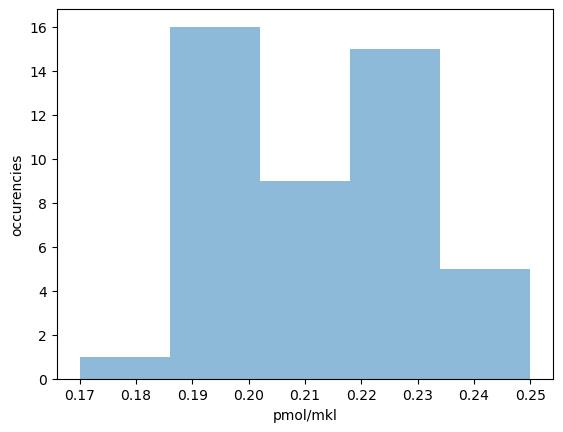

In [238]:
"""
смотрим распределение по корзинам
"""
ax = result['final conc, pmol/mkl'].plot.hist(bins=5, alpha=0.5)
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

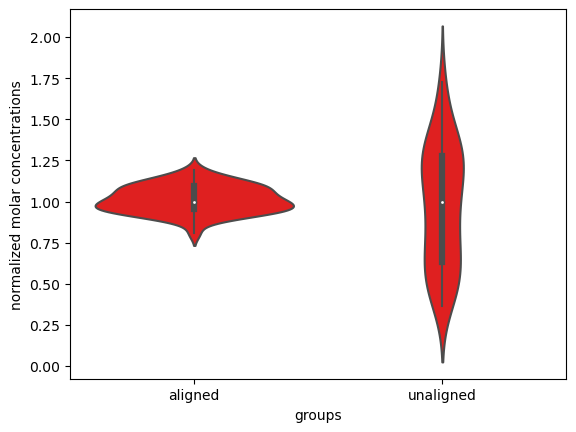

In [239]:
comparison_df = pd.DataFrame([initial_oligos_concentrations, result['final conc, pmol/mkl']]).T
comparison_df["unaligned"] = comparison_df["corrected_molar_concentration_pmol/mkl"]/comparison_df["corrected_molar_concentration_pmol/mkl"].median()
comparison_df["aligned"] = comparison_df['final conc, pmol/mkl']/comparison_df['final conc, pmol/mkl'].median()
comparison_df = comparison_df[["aligned", "unaligned"]]
comparison_df = comparison_df.melt(var_name='groups', value_name='normalized molar concentrations')

import seaborn as sns

ax = sns.violinplot(x = "groups", y="normalized molar concentrations", data=comparison_df, color='r', alpha = 0.1)


# final concentration dependency on yield:
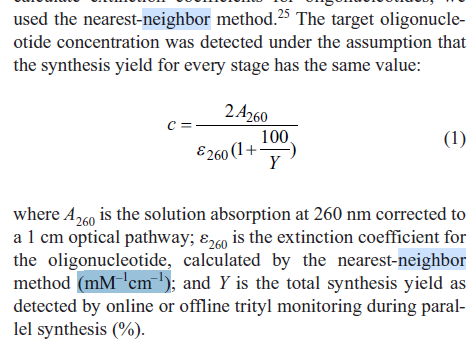
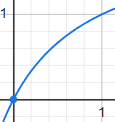

In [204]:
Сравниваем 4 эксперимента 
 - с выравниванием и без + эти два с очисткой на магнитных частицах
 - Как сравнивать? 
     - смотреть распределение продуктов на капиллярном форезе
     - по интенсивности на форезе при одинаковом количестве циклов 
     - на риалтаймнике
 - Можно ли одновременно на риалтаймнике?


SyntaxError: invalid syntax (2085183416.py, line 1)

In [205]:
worklist_df

,0,1,2,3,4
0,384well,153,96well,1,8
1,384well,154,96well,1,10
2,384well,155,96well,1,12
3,384well,156,96well,1,10
4,384well,157,96well,1,9
5,384well,158,96well,1,7
6,384well,159,96well,1,12
7,384well,160,96well,1,10
8,384well,161,96well,1,9
9,384well,162,96well,1,6


In [185]:
worklist_df.to_csv(f'./content/{EXPERIMENT_NAME}/{EXPERIMENT_NAME}_equalized_conc_worklist_{POOL_NAME}.csv', encoding='UTF8', header=None, index=False)

In [186]:
result

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A230,A260,A280,Nucleic Acid Factor,...,corrected_molar_concentration_pmol/mkl,corrected_weght_concentration,corrected_Nucleic_Acid_Factor,pM/mkl,score,mkl,quantile,pmol,"final conc, pmol/mkl",target_well
186,E19,NaN,phiX174-V2_F4-1,2139.69,1.79,1.12,5.81,6.48,3.63,33,...,15.54,201.83,31.13,164.764161,True,6.0,6,93.24,0.25,1
187,F19,NaN,phiX174-V2_F4-2,2183.11,1.74,1.01,6.53,6.62,3.80,33,...,13.12,208.49,31.52,137.360743,True,7.0,5,91.84,0.24,1
188,G19,NaN,phiX174-V2_F4-3,1675.81,1.90,1.11,4.56,5.08,2.67,33,...,11.66,159.69,31.45,122.341544,True,8.0,4,93.28,0.25,1
189,H19,NaN,phiX174-V2_F4-4,2370.60,1.96,1.06,6.75,7.18,3.66,33,...,11.98,219.97,30.62,129.069422,True,8.0,4,95.84,0.25,1
190,I19,NaN,phiX174-V2_F4-5,795.92,1.79,0.90,2.68,2.41,1.35,33,...,4.28,75.77,31.42,44.910421,False,21.0,NaN,89.88,0.24,1
191,J19,NaN,phiX174-V2_F4-6,1384.62,1.89,0.97,4.31,4.20,2.22,33,...,9.27,131.47,31.33,97.589959,True,9.0,3,83.43,0.22,1
192,K19,NaN,phiX174-V2_F4-7,1375.20,1.75,0.90,4.65,4.17,2.38,33,...,10.23,133.34,32.00,105.497176,True,9.0,3,92.07,0.24,1
193,L19,NaN,phiX174-V2_F4-8,1366.64,1.81,1.14,3.63,4.14,2.29,33,...,9.56,135.09,32.62,96.670600,True,9.0,3,86.04,0.23,1
194,M19,NaN,phiX174-V2_F4-9,2204.54,1.95,1.19,5.63,6.68,3.42,33,...,14.40,198.55,29.72,159.854455,True,6.0,6,86.40,0.23,1
195,N19,NaN,phiX174-V2_F4-10,1276.96,1.60,0.99,3.91,3.87,2.42,33,...,7.18,128.06,33.09,71.641041,True,11.0,2,78.98,0.21,1
